# Cell Phone data Analysis - Naive Baise & KNN models

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
Cellphone = pd.read_csv(r'C:\Users\user\Inceptez Training\Cellphone.csv')

In [3]:
Cellphone.shape

(2000, 21)

In [4]:
Cellphone[:10]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
Cellphone.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
X = Cellphone.drop('price_range',1)

C:\Users\user\AppData\Local\Temp/ipykernel_32176/3341030297.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = Cellphone.drop('price_range',1)


In [7]:
X[:10]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0


In [8]:
y = Cellphone.iloc[:, -1]

In [9]:
y[:10]

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=5)

### Modelling - A. Using Naive Baise Algorithm

In [11]:
model = GaussianNB()

In [12]:
model.fit(X_train, y_train)

GaussianNB()

### Prediction

In [13]:
y_pred = model.predict(X_test)

### Model Metrics

In [14]:
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.8216666666666667


### Confusion Matrix

In [15]:
confusion_matrix(y_test, y_pred)

array([[144,   8,   0,   0],
       [ 10, 111,  27,   0],
       [  0,  30, 105,  14],
       [  0,   0,  18, 133]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       152
           1       0.74      0.75      0.75       148
           2       0.70      0.70      0.70       149
           3       0.90      0.88      0.89       151

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [17]:
correlation = Cellphone.corr()
print(correlation["price_range"].sort_values(ascending=False))

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()

In [19]:
plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

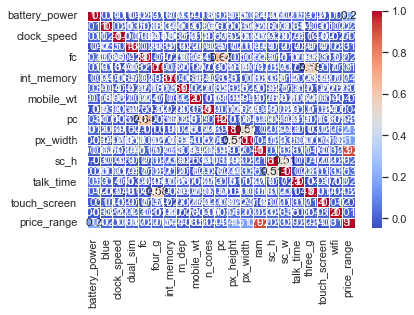

In [20]:
sns.heatmap(Cellphone.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       152
           1       0.74      0.75      0.75       148
           2       0.70      0.70      0.70       149
           3       0.90      0.88      0.89       151

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



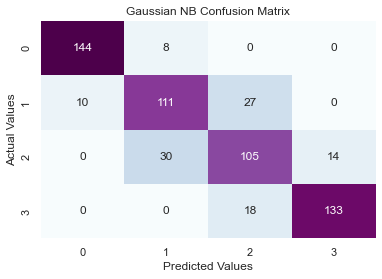

In [22]:
cm_rfc=my_confusion_matrix(y_test, y_pred, 'Gaussian NB Confusion Matrix')

### Modelling - B. KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [25]:
y_pred_knn = knn.predict(X_test)

In [26]:
acc_score = accuracy_score(y_test, y_pred_knn)
print(acc_score)

0.925


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       152
           1       0.89      0.91      0.90       148
           2       0.91      0.87      0.89       149
           3       0.96      0.95      0.95       151

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.93      0.92       600



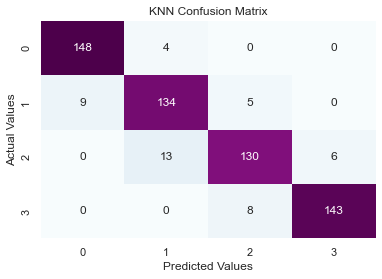

In [27]:
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

# Inference :- KNN (with Accuracy score of 0.925) is better model than Naive Base(with Accuracy score of 0.821)